In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X1 = np.hstack([np.linspace(1, 2, 100), np.linspace(3, 4, 100)]).reshape(-1, 1)+np.random.rand(200, 1)
X2 = np.hstack([np.linspace(2, 3, 100), np.linspace(5, 6, 100)]).reshape(-1, 1)+np.random.rand(200, 1)

X = np.c_[X1, X2]

y = np.hstack([np.zeros(100), np.ones(100)]).ravel().astype('int16')

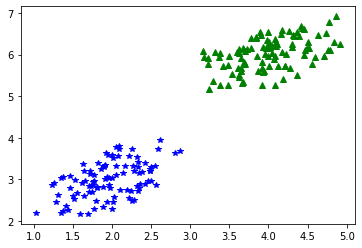

In [3]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC

In [5]:
std_scaler = StandardScaler()
X_scale = std_scaler.fit_transform(X)

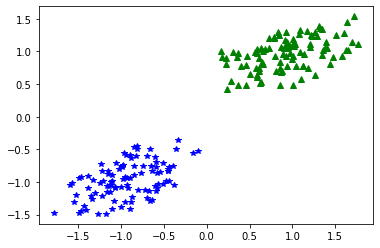

In [6]:
plt.plot(X_scale[y == 0, 0], X_scale[y == 0, 1], 'b*')
plt.plot(X_scale[y == 1, 0], X_scale[y == 1, 1], 'g^')

In [7]:
svm_clf = LinearSVC(C = 2, loss = 'hinge')
svm_clf.fit(X_scale, y)

LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [8]:
def plot_decision_line(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_
    
    x0 = np.linspace(xmin, xmax, 200)
    x1 = -(w[0]*x0+b)/w[1]
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    decision_boundary = X_new[:, 1]
    
    margin = 1/w[1]
    
    gutter_up = decision_boundary+margin
    gutter_down = decision_boundary-margin
    
    decision_function = svm_clf.decision_function(X_scale)
    sv_indices = np.where((2*y-1)*decision_function <= 1)[0]
    sv = X_scale[sv_indices]
    
    plt.scatter(sv[:, 0], sv[:, 1], s = 100, facecolors = '#FFAAAA')
    plt.plot(X_new[:, 0], decision_boundary, 'black')
    plt.plot(X_new[:, 0], gutter_up, 'k--')
    plt.plot(X_new[:, 0], gutter_down, 'k--')
    
    plt.plot(X_scale[y == 0, 0], X_scale[y == 0, 1], 'b*')
    plt.plot(X_scale[y == 1, 0], X_scale[y == 1, 1], 'g^')

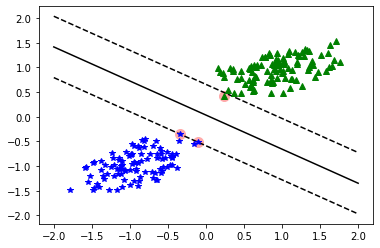

In [9]:
plot_decision_line(svm_clf, -2, 2)

In [10]:
from sklearn.datasets import make_blobs

In [11]:
data, target = make_blobs(n_samples = 100, n_features = 2, centers = 2)

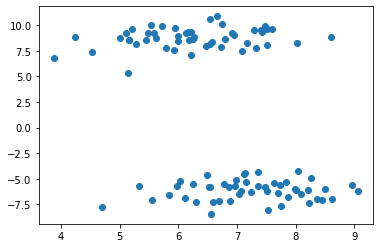

In [12]:
plt.scatter(data[:, 0], data[:, 1])

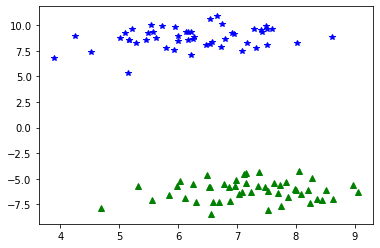

In [13]:
plt.plot(data[target == 0, 0], data[target == 0, 1], 'b*')
plt.plot(data[target == 1, 0], data[target == 1, 1], 'g^')

In [14]:
svm_clf = SVC(kernel = 'linear', C = 2, probability = True)
svm_clf.fit(data, target)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

C:\Users\subho\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'inline'
  from ipykernel import kernelapp as app


Text(0, 0.5, 'X2')

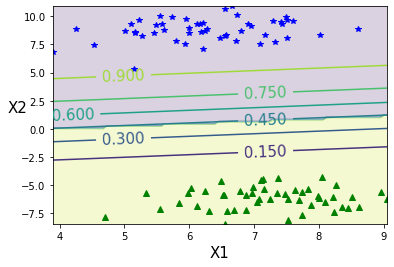

In [15]:
x0, x1 = np.meshgrid(
    np.linspace(data[:, 0].min(), data[:, 0].max(), 100),
    np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = svm_clf.predict(X_new).reshape(x0.shape)
y_prob = svm_clf.predict_proba(X_new)[:, 0].reshape(x0.shape)

plt.plot(data[target == 0, 0], data[target == 0, 1], 'b*')
plt.plot(data[target == 1, 0], data[target == 1, 1], 'g^')

plt.contourf(x0, x1, y_pred, alpha = 0.2)
contour = plt.contour(x0, x1, y_prob, inline = True)

plt.clabel(contour, fontsize = 15)
plt.xlabel('X1', fontsize = 15, rotation = 0)
plt.ylabel('X2', fontsize = 15, rotation = 0)

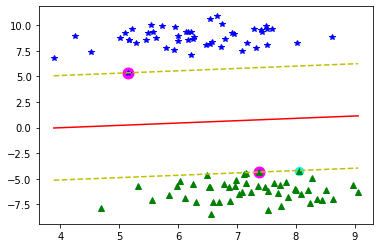

In [16]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_

x0 = np.linspace(data[:, 0].min(), data[:, 0].max(), 200)
x1 = -(w[0]*x0+b)/w[1]

X_new = np.c_[x0.ravel(), x1.ravel()]

margin = 1/w[1]

gutter_up = x1+margin
gutter_down = x1-margin

sv = svm_clf.support_vectors_

plt.scatter(sv[:, 0], sv[:, 1], s = 120, facecolor = 'magenta')

decision_function = svm_clf.coef_.dot(data.T)+svm_clf.intercept_
# decision_function = svm_clf.decision_function(data)
sv_indices = np.where((2*target-1)*decision_function <= 1)[0]
sv = data[sv_indices]

plt.scatter(sv[:, 0], sv[:, 1], s = 70, facecolor = 'cyan')

plt.plot(data[target == 0, 0], data[target == 0, 1], 'b*')
plt.plot(data[target == 1, 0], data[target == 1, 1], 'g^')

plt.plot(x0, x1, 'r-')
plt.plot(x0, gutter_up, 'y--')
plt.plot(x0, gutter_down, 'y--')